# Audio data

We need to first get a better understanding of our audio data. Here we will look at some key concepts and features of audio data.

An audio signal is the vibration generated when sound passes through air.  For audio, when sound is captured from a microphone, it is in analog form.  The analog sound is converted to digital sound format by sampling at consistent intervals of time. The number of audio data points recorded every second is called the `sample rate`. 

- The higher the `sample rate`, the higher the quality of the sound. However, after a certain point the difference is not able to be detected by the human ear. 
- The average sound sample rate is 48 kHz or 48,000 samples per second. The dataset we will be using in this module was sampled at 16kHz, so our sample rate is 16,000.

<img alt="Audio sound wave diagram" src="2-understand-audio-data-1.png" width="60%"/>

When the audio is sampled, the `frequency` of the sound is the number of times per second that a sound wave repeats itself.  On the other hand, the `amplitude` is how loud the audio is.  We can take our sample rate and frequency and represent the signal visually. This visual signal can be represented as a `waveform` which is the `signal` representation over time in a graphical format. The audio can be recorded in different `channels`. For example, stereo recording have 2 channels, right and left.

Now that we understand a bit about how we get our audio file. Let's take a moment to understand how we might want to parse out a file. For example if you have longer audio files you may want to split it out into `frames` or sections of the audio to be classified individually. For this dataset we don't need to set any frames of our audio samples as each sample is only one second and one word. Another processing step might be an `offset` which means the number of frames from the start of the file to begin data loading.


## Get setup with TorchAudio

TorchAudio is a library that is part of the PyTorch ecosystem that has I/O functionality, popular open datasets and common audio transformations that we will need to build our model. We will use this library to work with our audio data.

Let's get started! First, we will import the packages needed:

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/audio-pytorch/install-packages.txt

In [11]:
# import the packages
import os
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

## Get the speech commands Dataset

PyTorch has a variety of sample datasets available, which is super helpful when trying to learn and play around with different audio models. We will use one of these datasets called the Speech Commands and download the full dataset in a local directory.  However, we are going to only use the `yes` and `no` classes to create a binary classification model. 

### Create a data folder

In [ ]:
default_dir = os.getcwd()
folder = 'data'
print(f'Data directory will be: {default_dir}/{folder}')

if os.path.isdir(folder):
    print("Data folder exists.")
else:
    print("Creating folder.")
    os.mkdir(folder) 

### Download the dataset to the data folder

We will use `torchaudio` to download the dataset files to a local folder.  PyTorch provides multiple sample image, text and audio datasets.  We'll be using the `SPEECHCOMMANDS` dataset from the `torchaudio` library.

In [13]:
trainset_speechcommands = torchaudio.datasets.SPEECHCOMMANDS(f'./{folder}/', download=True)


### Visualize the classes available in the dataset

There are 36 audio classes in the Speech Commands dataset each sampled at 16KHz.  Let's print the different commands available.  The two classes we'll be using are the **yes** and **no** commands.

In [14]:
os.chdir(f'./{folder}/SpeechCommands/speech_commands_v0.02/')
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)} \n')
print(f'Label Names: {labels}')

Total Labels: 36 

Label Names: ['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


## Convert the sound to Tensor

You likely have used a wave file before and understand that this is one format in which we save our digital representation of our analog audio to be shared and played. The Speech Commands dataset that we will be using in this tutorial is stored in wave files that are all one second or less.

Let's load up one of the wave files and take a look at how the tensors for the `waveform` looks. We are loading the files using `torchaudio.load` which loads an audio file into a `torch.Tensor` object. TorchAudio has abstracted the load functions for different audio backends meaning you don't have to worry about the implementation. The `torch.load` function returns the waveform as a tensor and an int of the `sample_rate`. 

In [15]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3)
print(f'waveform tensor with 3 frames:  {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3, frame_offset =2)
print(f'waveform tensor with 2 frame_offsets: {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename)
print(f'waveform tensor:  {waveform}' )

waveform tensor with 3 frames:  tensor([[0.0005, 0.0007, 0.0005]]) 

waveform tensor with 2 frame_offsets: tensor([[0.0005, 0.0004, 0.0007]]) 

waveform tensor:  tensor([[0.0005, 0.0007, 0.0005,  ..., 0.0008, 0.0008, 0.0007]])


## Plot the waveform

Below we will create a `plot_audio` function to display the waveform and listen to a sample of each class.

In [16]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

The size of the audio is 1x16000.  Meaning it is 1 second long at a sample rate of 16000.  We can see the graphical waveform of the sound pattern captured and play the audio for the `yes` command.

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


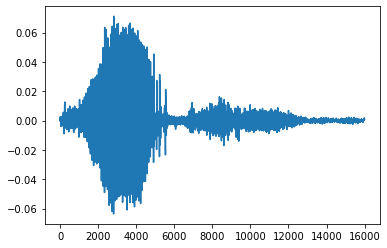

In [17]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Next, let's look at waveform and audio for the `no` command.  As you can see, the waveform differs from the sound pattern for `yes`.

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


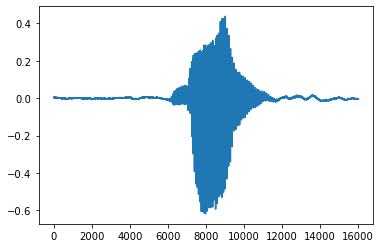

In [18]:
filename = "./data/SpeechCommands/speech_commands_v0.02/no/0b40aa8e_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)